In [45]:
# Specify the name that is used to seach for the data
place_name = "Ступино, Московская область, RU"

In [46]:
!pip install osmnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install geojson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install h3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.7 MB/s eta 0:00:00


In [47]:
import osmnx as ox
import geopandas as gpd

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

In [48]:
!pip install contextily
import contextily as cx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import geopandas as gpd
import numpy as np
import json
import h3
import folium
import osmnx as ox
from shapely import wkt
from folium.plugins import HeatMap
from shapely.geometry import Polygon
from folium.plugins import MarkerCluster, HeatMap
import pandas as pd
from shapely.geometry import Polygon
from geojson import Feature, Point, FeatureCollection, Polygon
import plotly.express as px
from tqdm import tqdm

tqdm.pandas()

In [8]:

area

geometry  bbox_north  bbox_south  \
0  POLYGON ((37.98761 54.94530, 37.98814 54.94432...   54.947919   54.840718   

   bbox_east  bbox_west   place_id osm_type    osm_id        lat        lon  \
0  38.199155  37.987605  115321129      way  37094231  54.886598  38.077259   

                                        display_name  class  type  importance  
0  Stupino, City district Stupino, Moscow Oblast,...  place  town    0.597641

In [9]:
type(area.geometry)

geopandas.geoseries.GeoSeries

<Axes: >

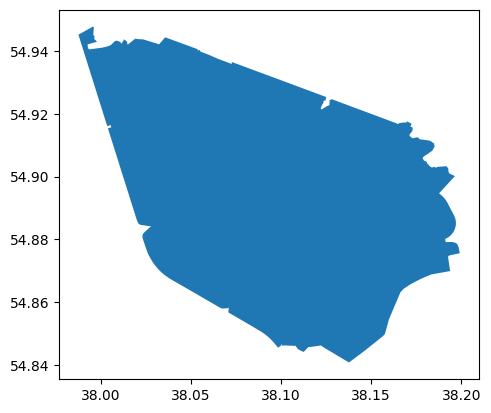

In [10]:
area.plot()

In [ ]:
drive = ox.graph_from_place(place_name, network_type='drive')
ox.plot_graph(drive)

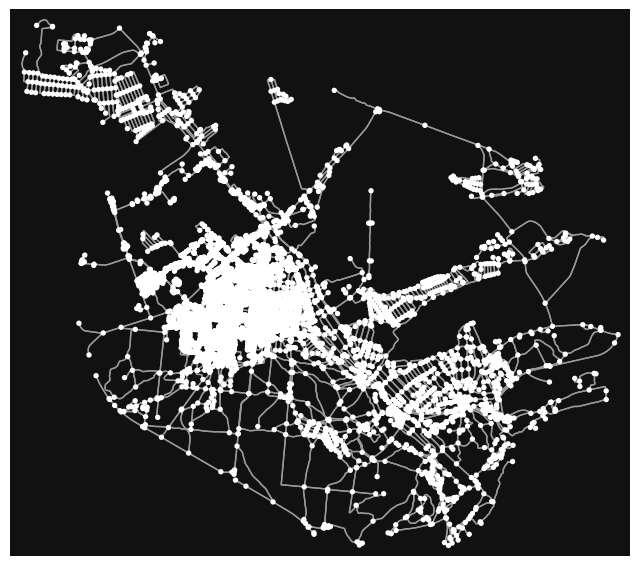

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [12]:
walk = ox.graph_from_place(place_name, network_type='walk')
ox.plot_graph(walk)

In [13]:
tags = {'amenity': True, 'landuse': ['retail', 'commercial'], 'shop': True, 'office': True, 'tourism': True}   

items = ox.geometries_from_place(place_name, tags)
items

name tourism  \
element_type osmid                                                           
node         439193855                               Hotel Central  hostel   
             440826527                                      Магнит     NaN   
             446218402                                  BP Ступино     NaN   
             446266808                                         NaN     NaN   
             446266815                                         NaN     NaN   
...                                                            ...     ...   
relation     7146337                                           NaN     NaN   
             10294944                   Церковь Николая Чудотворца     NaN   
             10294945   Церковь Усекновения Головы Иоанна Предтечи     NaN   
             10294946                  Церковь Сергия Радонежского     NaN   
             10294947        Свято-Троицкий Белопесоцкий монастырь     NaN   

                                                                 geometry  \
element_type osmid                                                          
node         439193855                          POINT (38.07850 54.88546)   
             440826527                          POINT (38.05929 54.88626)   
             446218402                          POINT (38.08016 54.90018)   
             446266808                          POINT (38.07686 54.90918)   
             446266815                          POINT (38.07028 54.89817)   
...                                                                   ...   
relation     7146337    POLYGON ((38.05169 54.88813, 38.05174 54.88835...   
             10294944   POLYGON ((38.15092 54.85451, 38.15096 54.85453...   
             10294945   POLYGON ((38.15079 54.85423, 38.15076 54.85425...   
             10294946   POLYGON ((38.15054 54.85404, 38.15051 54.85405...   
             10294947   POLYGON ((38.15063 54.85399, 38.15020 54.85373...   

                               shop           amenity opening_hours operator  \
element_type osmid                                                             
node         439193855          NaN               NaN           NaN      NaN   
             440826527  supermarket               NaN           NaN      NaN   
             446218402          NaN              fuel          24/7       BP   
             446266808          NaN          car_wash           NaN      NaN   
             446266815      bicycle               NaN           NaN      NaN   
...                             ...               ...           ...      ...   
relation     7146337            NaN           parking           NaN      NaN   
             10294944           NaN  place_of_worship           NaN      NaN   
             10294945           NaN  place_of_worship           NaN      NaN   
             10294946           NaN  place_of_worship           NaN      NaN   
             10294947           NaN         monastery           NaN      NaN   

                       addr:country website brand  ... name:signed  \
element_type osmid                                 ...               
node         439193855          NaN     NaN   NaN  ...         NaN   
             440826527          NaN     NaN   NaN  ...         NaN   
             446218402          NaN     NaN   NaN  ...         NaN   
             446266808          NaN     NaN   NaN  ...         NaN   
             446266815          NaN     NaN   NaN  ...         NaN   
...                             ...     ...   ...  ...         ...   
relation     7146337            NaN     NaN   NaN  ...         NaN   
             10294944           NaN     NaN   NaN  ...         NaN   
             10294945           NaN     NaN   NaN  ...         NaN   
             10294946           NaN     NaN   NaN  ...         NaN   
             10294947           NaN     NaN   NaN  ...         NaN   

                       building:levels:underground toilets:access toilets:fee  \
element_type

In [14]:
df_wm = items.to_crs(epsg=3857)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
df_wm

name tourism  \
element_type osmid                                                           
node         439193855                               Hotel Central  hostel   
             440826527                                      Магнит     NaN   
             446218402                                  BP Ступино     NaN   
             446266808                                         NaN     NaN   
             446266815                                         NaN     NaN   
...                                                            ...     ...   
relation     7146337                                           NaN     NaN   
             10294944                   Церковь Николая Чудотворца     NaN   
             10294945   Церковь Усекновения Головы Иоанна Предтечи     NaN   
             10294946                  Церковь Сергия Радонежского     NaN   
             10294947        Свято-Троицкий Белопесоцкий монастырь     NaN   

                                                                 geometry  \
element_type osmid                                                          
node         439193855                    POINT (4238879.252 7339667.661)   
             440826527                    POINT (4236740.260 7339822.020)   
             446218402                    POINT (4239063.609 7342516.712)   
             446266808                    POINT (4238697.078 7344258.981)   
             446266815                    POINT (4237964.062 7342128.731)   
...                                                                   ...   
relation     7146337    POLYGON ((4235894.699 7340184.783, 4235899.920...   
             10294944   POLYGON ((4246941.288 7333680.169, 4246945.941...   
             10294945   POLYGON ((4246926.616 7333626.429, 4246923.499...   
             10294946   POLYGON ((4246898.252 7333589.358, 4246895.302...   
             10294947   POLYGON ((4246909.006 7333579.573, 4246861.350...   

                               shop           amenity opening_hours operator  \
element_type osmid                                                             
node         439193855          NaN               NaN           NaN      NaN   
             440826527  supermarket               NaN           NaN      NaN   
             446218402          NaN              fuel          24/7       BP   
             446266808          NaN          car_wash           NaN      NaN   
             446266815      bicycle               NaN           NaN      NaN   
...                             ...               ...           ...      ...   
relation     7146337            NaN           parking           NaN      NaN   
             10294944           NaN  place_of_worship           NaN      NaN   
             10294945           NaN  place_of_worship           NaN      NaN   
             10294946           NaN  place_of_worship           NaN      NaN   
             10294947           NaN         monastery           NaN      NaN   

                       addr:country website brand  ... name:signed  \
element_type osmid                                 ...               
node         439193855          NaN     NaN   NaN  ...         NaN   
             440826527          NaN     NaN   NaN  ...         NaN   
             446218402          NaN     NaN   NaN  ...         NaN   
             446266808          NaN     NaN   NaN  ...         NaN   
             446266815          NaN     NaN   NaN  ...         NaN   
...                             ...     ...   ...  ...         ...   
relation     7146337            NaN     NaN   NaN  ...         NaN   
             10294944           NaN     NaN   NaN  ...         NaN   
             10294945           NaN     NaN   NaN  ...         NaN   
             10294946           NaN     NaN   NaN  ...         NaN   
             10294947           NaN     NaN   NaN  ...         NaN   

                       building:levels:underground toilets:access toilets:fee  \
element_type

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


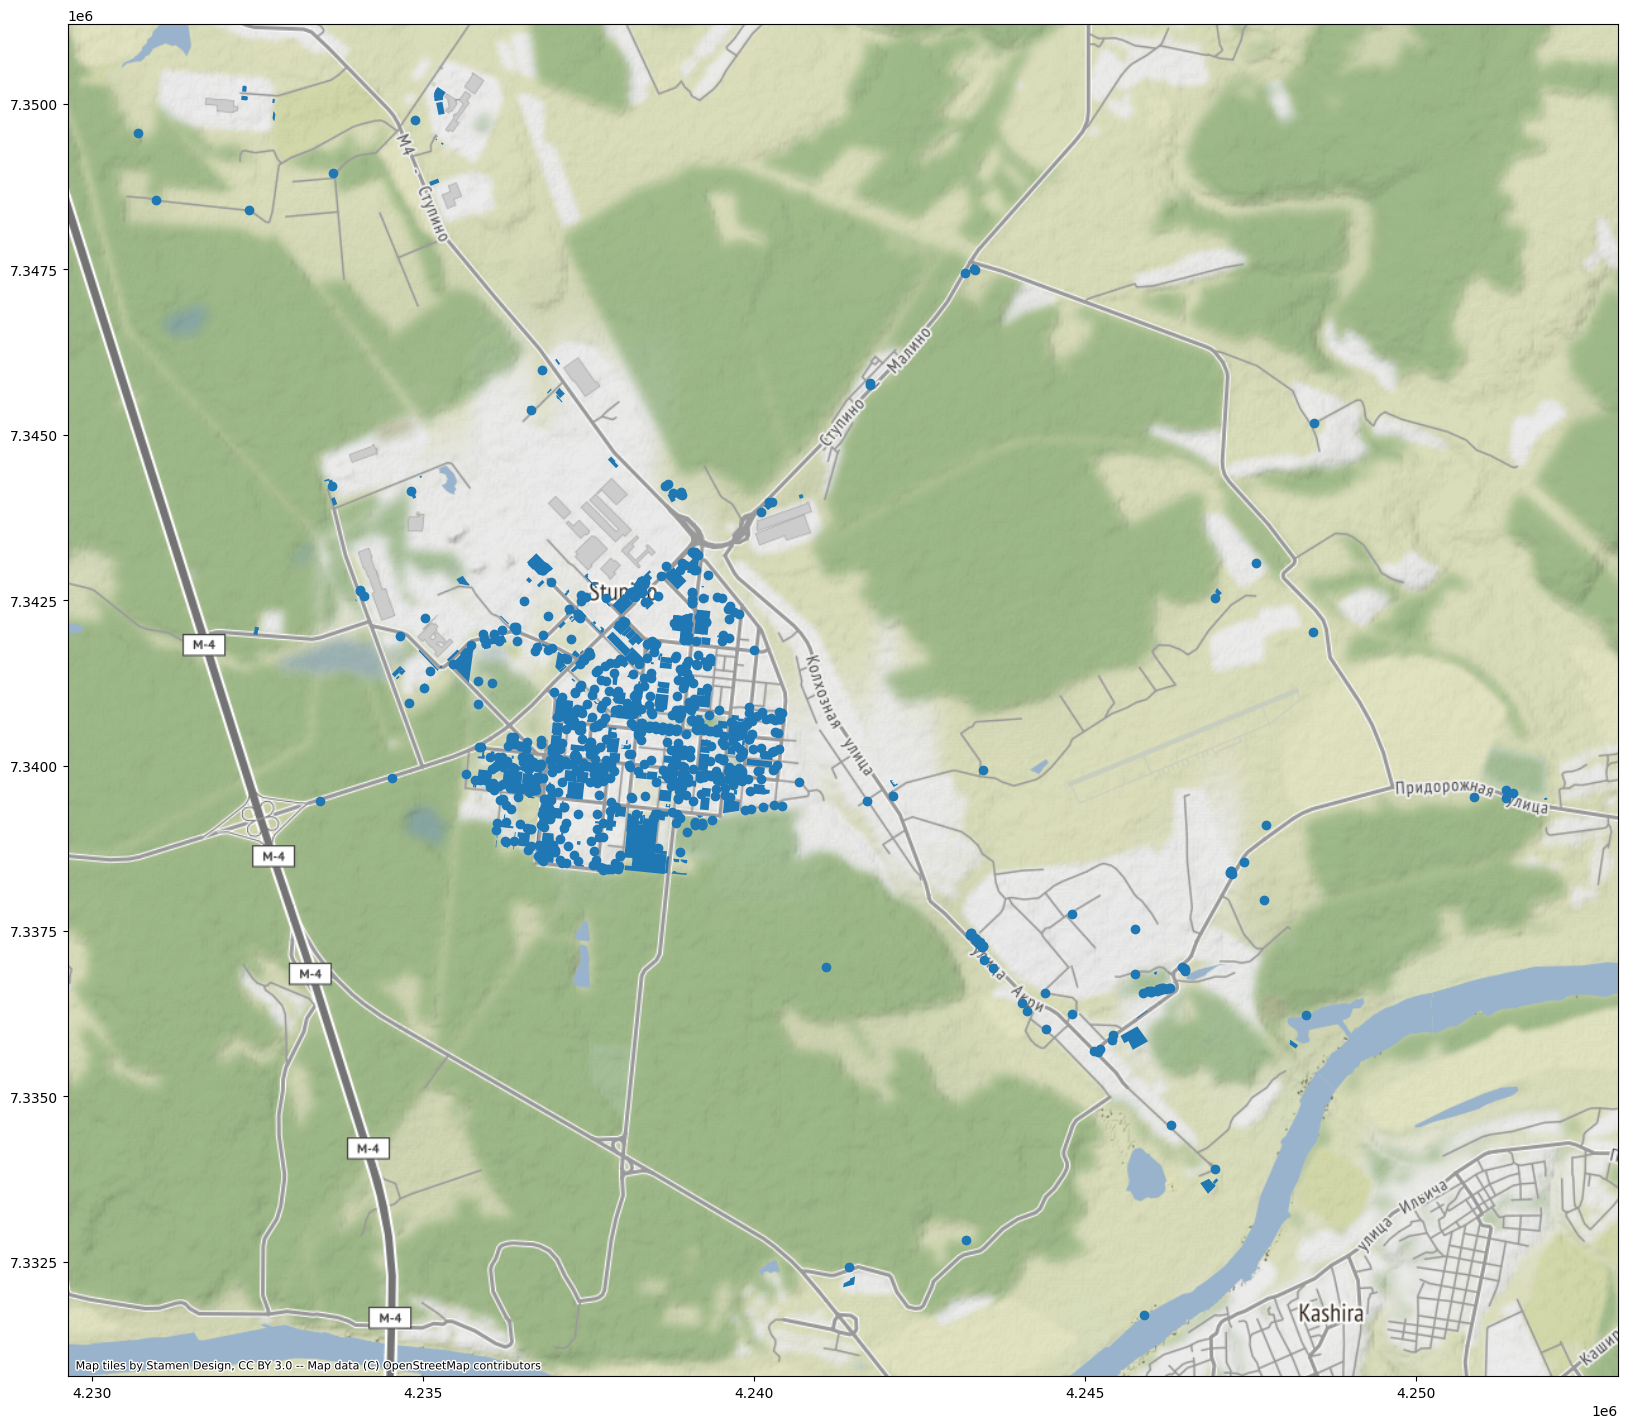

In [16]:
item_plot = df_wm.plot(figsize=(20,20), alpha = 1)
cx.add_basemap(item_plot)
# cx.add_basemap(item_plot, source=cx.providers.Stamen.TonerLite)
# cx.add_basemap(item_plot, source=cx.providers.Stamen.WaterColor)
# cx.add_basemap(item_plot, source=cx.providers.Stamen.TonerLabels)

In [17]:
df_wm = items

In [71]:
len(list(df_wm.columns))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



159

In [19]:
type(df_wm)

geopandas.geodataframe.GeoDataFrame

In [20]:
print(df_wm["amenity"].unique ())

[nan 'fuel' 'car_wash' 'taxi' 'restaurant' 'pharmacy' 'cinema' 'cafe'
 'post_box' 'telephone' 'parking' 'bank' 'community_centre' 'fast_food'
 'recycling' 'waste_disposal' 'library' 'kindergarten' 'bench' 'toilets'
 'police' 'post_office' 'veterinary' 'studio' 'parking_entrance' 'clinic'
 'waste_basket' 'bicycle_parking' 'atm' 'theatre' 'dentist' 'courthouse'
 'compressed_air' 'drinking_water' 'place_of_worship' 'pub'
 'driving_school' 'bar' 'hunting_stand' 'doctors' 'payment_terminal'
 'vending_machine' 'parcel_locker' 'school' 'bus_station'
 'social_facility' 'fountain' 'university' 'music_school' 'training'
 'college' 'hospital' 'townhall' 'fire_station' 'customs' 'monastery']


In [21]:
for i in ['library', 'police', 'bench', 'bench_basket', 'bus_station', 'courthouse', 'place_of_worship', 'fontain', 'customs', 'townhail', 'fire_station', 'monastery' ]:
  df_filter_amenity = df_wm[items.amenity != i]

In [22]:
print(df_filter_amenity["tourism"].unique ())

['hostel' nan 'attraction' 'viewpoint' 'artwork' 'hotel' 'information'
 'museum' 'gallery' 'picnic_site' 'guest_house']


In [23]:
for i in ['attraction', 'information' ]:
  df_filter_tourism = df_filter_amenity[df_filter_amenity.amenity != i]

In [24]:
print(df_filter_tourism["office"].unique ())

[nan 'insurance' 'financial' 'telecommunication' 'company'
 'property_management' 'government' 'association' 'estate_agent'
 'logistics']


In [25]:
for i in ['government']:
  df_filter_office = df_filter_tourism[df_filter_tourism.amenity != i]

In [26]:
print(df_filter_office["shop"].unique ())

[nan 'supermarket' 'bicycle' 'convenience' 'yes' 'kiosk' 'books'
 'hairdresser' 'toys' 'hunting' 'doityourself' 'alcohol' 'clothes'
 'car_parts' 'furniture' 'pet' 'car_repair' 'car' 'bakery' 'hardware'
 'jewelry' 'beauty' 'mobile_phone' 'cosmetics' 'stationery' 'sports'
 'shoes' 'shoe_repair' 'outdoor' 'computer' 'photo' 'dry_cleaning'
 'variety_store' 'wine' 'electronics' 'beverages' 'optician' 'coffee'
 'farm' 'Авокадо' 'florist' 'second_hand' 'bookmaker' 'locksmith'
 'e-cigarette' 'kitchen' 'outpost' 'paint' 'butcher' 'fishing'
 'travel_agency' 'copyshop' 'medical_supply' 'greengrocer' 'mall' 'ticket'
 'newsagent']


In [27]:
import geopandas as gpd
import numpy as np
import json
import h3
import folium
import osmnx as ox
from shapely import wkt
from folium.plugins import HeatMap
from shapely.geometry import Polygon
from folium.plugins import MarkerCluster, HeatMap
import pandas as pd
from shapely.geometry import Polygon
from geojson import Feature, Point, FeatureCollection, Polygon
import plotly.express as px
from tqdm import tqdm

tqdm.pandas()

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

In [28]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
df1 = df_filter_office

In [30]:
df1['geometry']

element_type  osmid    
node          439193855                            POINT (38.07850 54.88546)
              440826527                            POINT (38.05929 54.88626)
              446218402                            POINT (38.08016 54.90018)
              446266808                            POINT (38.07686 54.90918)
              446266815                            POINT (38.07028 54.89817)
                                                 ...                        
relation      7136244      POLYGON ((38.05598 54.88682, 38.05601 54.88699...
              7146337      POLYGON ((38.05169 54.88813, 38.05174 54.88835...
              10294944     POLYGON ((38.15092 54.85451, 38.15096 54.85453...
              10294945     POLYGON ((38.15079 54.85423, 38.15076 54.85425...
              10294946     POLYGON ((38.15054 54.85404, 38.15051 54.85405...
Name: geometry, Length: 1196, dtype: geometry

In [31]:
# df1['center_point'] = df1['geometry'].centroid
# #Extract lat and lon from the centerpoint
# df_wm["long"] = df_wm.Center_point.map(lambda p: p.x)
# df_wm["lat"] = df_wm.Center_point.map(lambda p: p.y)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
df1['geometry'] = df1['geometry'].centroid

<ipython-input-32-404b0d52eb58>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df1['geometry'] = df1['geometry'].centroid


In [33]:
# df1 = pd.DataFrame(df_wm)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
H3_res = 10  # размер гексагона [1 .. 15] чем больше, тем меньше площадь


def geo_to_h3(row):
    return h3.geo_to_h3(lat=row.geometry.x, lng=row.geometry.x, resolution=H3_res)


df1['h3_cell'] = df1.progress_apply(geo_to_h3, axis=1)

100%|██████████| 1196/1196 [00:00<00:00, 7854.54it/s]


In [35]:
# df1.lat

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
df1 = df1.reset_index()

In [82]:
df1["shop"][0]

nan

In [83]:
df1 = df1.astype(object).replace(np.nan, 'None')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [89]:
df1.dropna(axis=1, how='all')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



element_type      osmid                                        name  \
0            node  439193855                               Hotel Central   
1            node  440826527                                      Магнит   
2            node  446218402                                  BP Ступино   
3            node  446266808                                        None   
4            node  446266815                                        None   
...           ...        ...                                         ...   
1191     relation    7136244                              Поликлиника №8   
1192     relation    7146337                                        None   
1193     relation   10294944                  Церковь Николая Чудотворца   
1194     relation   10294945  Церковь Усекновения Головы Иоанна Предтечи   
1195     relation   10294946                 Церковь Сергия Радонежского   

     tourism                   geometry         shop           amenity  \
0     hostel  POINT (38.07850 54.88546)         None              None   
1       None  POINT (38.05929 54.88626)  supermarket              None   
2       None  POINT (38.08016 54.90018)         None              fuel   
3       None  POINT (38.07686 54.90918)         None          car_wash   
4       None  POINT (38.07028 54.89817)      bicycle              None   
...      ...                        ...          ...               ...   
1191    None  POINT (38.05696 54.88693)         None            clinic   
1192    None  POINT (38.05168 54.88794)         None           parking   
1193    None  POINT (38.15096 54.85445)         None  place_of_worship   
1194    None  POINT (38.15094 54.85428)         None  place_of_worship   
1195    None  POINT (38.15071 54.85411)         None  place_of_worship   

     opening_hours operator addr:country  ... name:signed  \
0             None     None         None  ...        None   
1             None     None         None  ...        None   
2             24/7       BP         None  ...        None   
3             None     None         None  ...        None   
4             None     None         None  ...        None   
...            ...      ...          ...  ...         ...   
1191          None     None         None  ...        None   
1192          None     None         None  ...        None   
1193          None     None         None  ...        None   
1194          None     None         None  ...        None   
1195          None     None         None  ...        None   

     building:levels:underground toilets:access toilets:fee fire_station:type  \
0                           None           None        None              None   
1                           None           None        None              None   
2                           None           None        None              None   
3                           None           None        None              None   
4                           None           None        None              None   
...                          ...            ...         ...               ...   
1191                        None           None        None              None   
1192                        None           None        None              None   
1193                        None           None        None              None   
1194                        None           None        None              None   
1195                        None           None        None              None   

     building:part                                               ways  \
0             None                                               None   
1             None                                               None   
2             None                                               None   
3             None                                               None   
4             None                                               None   
...            ...                                         

In [90]:
len(list(df1.columns))

161

In [91]:
df1.to_csv("locations.csv")

In [38]:
df1_g = df1.groupby("h3_cell")["osmid"].count().reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
df1_g

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


h3_cell  osmid
0    8a2da9920907fff     16
1    8a2da992090ffff     16
2    8a2da9920917fff      5
3    8a2da9920947fff     16
4    8a2da992094ffff     22
..               ...    ...
112  8a2dad2de2dffff      1
113  8a2dad2de70ffff      5
114  8a2dad2de71ffff      2
115  8a2dad2de757fff     10
116  8a2dad2de75ffff      8

[117 rows x 2 columns]

In [40]:
# aa = list(set(df1['amenity']))
# ak = {i: k for k, i in enumerate(aa)}
# aki = {k:i for k, i in enumerate(aa)}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
# def aggr(amenities, aa=aa, ak=ak):
#   a = np.zeros(len(aa))
#   for i in amenities:
#     a[ak[i]] +=1
#   return 

In [42]:
# # df1_g = df1.groupby("h3_cell")["amenity"]
# # list(df1.columns)
# # df1[['fuel:diesel','fuel:octane_92','fuel:octane_95','shop', 'parking']]
# df1_c = df1.groupby("h3_cell")["amenity"].apply(aggr).reset_index()

In [43]:
# df1_c

In [44]:
# ams = pd.DataFrame(df1_c.amenity.to_list(), index= df1_c.h3_cell)
# ams.rename(columns=aki, inplace=True)
# ams

In [ ]:
# ams.reset_index()

In [49]:
df1_g.columns

Index(['h3_cell', 'osmid'], dtype='object')

In [50]:
df1_g.rename(columns = {'h3_cell':'h3_cell','osmid':'count'}, inplace = True )

In [51]:
# df1_g = (df1
#         .groupby('h3_cell')
#       )
# # Let's count each points inside the hexagon

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
df1_g

h3_cell  count
0    8a2da9920907fff     16
1    8a2da992090ffff     16
2    8a2da9920917fff      5
3    8a2da9920947fff     16
4    8a2da992094ffff     22
..               ...    ...
112  8a2dad2de2dffff      1
113  8a2dad2de70ffff      5
114  8a2dad2de71ffff      2
115  8a2dad2de757fff     10
116  8a2dad2de75ffff      8

[117 rows x 2 columns]

In [53]:
from shapely.geometry import Polygon

def add_geometry(row):
    points = h3.h3_to_geo_boundary(row['h3_cell'], True)
    return Polygon(points)

In [54]:
df1_g['geometry'] = (df1_g.progress_apply(add_geometry, axis=1))

100%|██████████| 117/117 [00:00<00:00, 7351.26it/s]


In [55]:
df1_g['geometry']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      POLYGON ((38.05218020142331 38.05387442129382,...
1      POLYGON ((38.05349939108837 38.054482862789584...
2      POLYGON ((38.05222183650425 38.05263727463672,...
3      POLYGON ((38.05477698634001 38.056328402789454...
4      POLYGON ((38.056096206062996 38.05693679123518...
                             ...                        
112    POLYGON ((38.124844613221065 38.12500867642995...
113    POLYGON ((38.11700589763435 38.11889368507298,...
114    POLYGON ((38.117046671190145 38.11765721753874...
115    POLYGON ((38.1183258911238 38.11950077180554, ...
116    POLYGON ((38.11964589065713 38.120107836454814...
Name: geometry, Length: 117, dtype: object

In [56]:
def hexagons_dataframe_to_geojson(df_hex, hex_id_field, geometry_field, value_field, file_output=None):
    list_features = []

    for i, row in df_hex.iterrows():
        feature = Feature(geometry=row[geometry_field],
                          id=row[hex_id_field],
                          properties={"value": row[value_field]})
        list_features.append(feature)

    feat_collection = FeatureCollection(list_features)

    if file_output is not None:
        with open(file_output, "w") as f:
            json.dump(feat_collection, f)

    else:
        return feat_collection

geojson_obj = (hexagons_dataframe_to_geojson
               (df1_g,
                hex_id_field='h3_cell',
                value_field='count',
                geometry_field='geometry'))

In [57]:
df1.geometry.x.mean(), df1.geometry.y.mean()

(38.07568989355296, 54.889780211610216)

In [58]:
df_plot = df1.to_crs(epsg=3857)

In [61]:
df1_plot

h3_cell  count                                           geometry
0    8a2da9920907fff     16  POLYGON ((38.05218 38.05387, 38.05175 38.05326...
1    8a2da992090ffff     16  POLYGON ((38.05350 38.05448, 38.05307 38.05387...
2    8a2da9920917fff      5  POLYGON ((38.05222 38.05264, 38.05180 38.05202...
3    8a2da9920947fff     16  POLYGON ((38.05478 38.05633, 38.05435 38.05571...
4    8a2da992094ffff     22  POLYGON ((38.05610 38.05694, 38.05567 38.05632...
..               ...    ...                                                ...
112  8a2dad2de2dffff      1  POLYGON ((38.12484 38.12501, 38.12442 38.12439...
113  8a2dad2de70ffff      5  POLYGON ((38.11701 38.11889, 38.11658 38.11828...
114  8a2dad2de71ffff      2  POLYGON ((38.11705 38.11766, 38.11662 38.11704...
115  8a2dad2de757fff     10  POLYGON ((38.11833 38.11950, 38.11790 38.11889...
116  8a2dad2de75ffff      8  POLYGON ((38.11965 38.12011, 38.11922 38.11949...

[117 rows x 3 columns]

In [62]:
df1_plot = gpd.GeoDataFrame(df1_g, geometry='geometry')

In [63]:
df1_plot

h3_cell  count                                           geometry
0    8a2da9920907fff     16  POLYGON ((38.05218 38.05387, 38.05175 38.05326...
1    8a2da992090ffff     16  POLYGON ((38.05350 38.05448, 38.05307 38.05387...
2    8a2da9920917fff      5  POLYGON ((38.05222 38.05264, 38.05180 38.05202...
3    8a2da9920947fff     16  POLYGON ((38.05478 38.05633, 38.05435 38.05571...
4    8a2da992094ffff     22  POLYGON ((38.05610 38.05694, 38.05567 38.05632...
..               ...    ...                                                ...
112  8a2dad2de2dffff      1  POLYGON ((38.12484 38.12501, 38.12442 38.12439...
113  8a2dad2de70ffff      5  POLYGON ((38.11701 38.11889, 38.11658 38.11828...
114  8a2dad2de71ffff      2  POLYGON ((38.11705 38.11766, 38.11662 38.11704...
115  8a2dad2de757fff     10  POLYGON ((38.11833 38.11950, 38.11790 38.11889...
116  8a2dad2de75ffff      8  POLYGON ((38.11965 38.12011, 38.11922 38.11949...

[117 rows x 3 columns]

In [64]:
import plotly.express as px

fig = px.choropleth_mapbox(
    df1_plot,
    geojson=geojson_obj,
    locations='h3_cell',
    color='count',
    color_continuous_scale="Viridis",
    range_color=(0, df1_plot['count'].mean()),
    mapbox_style='carto-positron',
    zoom=1,
    center={"lat": df_plot.geometry.x.mean(), "lon": df_plot.geometry.y.mean()},# 54.886280, "lon": 38.078237},
    opacity=0.1,
    labels={'count': 'count of data'})
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show("notebook")
fig

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

